**PHẦN 1: DATA CLEANSING & FEATURE ENGINEERING**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re #sử dụng để tìm kiếm một mẫu trong chuỗi

In [ ]:
df = pd.read_csv("titanic_disaster.csv")
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


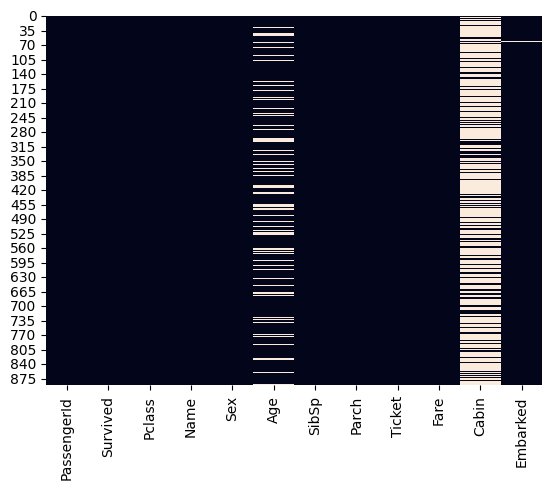

Missing values in Age: 177
Missing values in Cabin: 687
Missing values in Embarked: 2


In [ ]:
# Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map). Hãy cho nhận xét về tình trạng thiếu dữ liệu Age, Cabin và Embarked

missing_values = df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False)
plt.show()

print("Missing values in Age:", missing_values["Age"])
print("Missing values in Cabin:", missing_values["Cabin"])
print("Missing values in Embarked:", missing_values["Embarked"])

In [ ]:
# 3 Tách cột
df[['FirstName', 'SecondName']] = df['Name'].str.split(',',expand=True)
df = df.drop('Name', axis=1)

df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName
0,1,0,3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,female,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,female,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,male,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


In [ ]:
# 4: Xứ lý rút gọn kích thước dữ liệu trên cột Sex như sau: thay thế male  M và female  F

df['Sex'] = df['Sex'].replace(['male','female'],['M','F'])
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


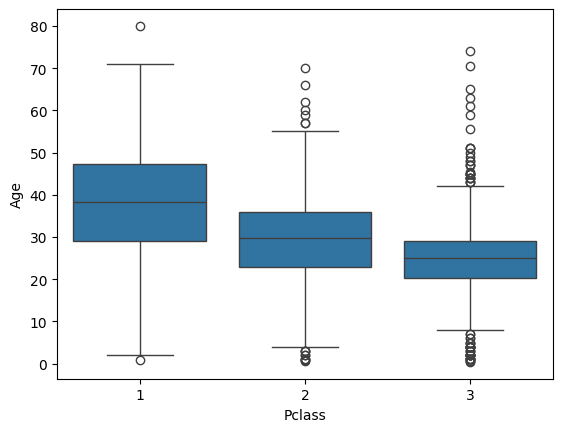

In [ ]:
# 5
sns.boxplot(x="Pclass", y="Age", data=df)
plt.show()
# giá trị trung bình tuổi toàn bộ hành khách hay theo từng nhóm hạng vé (hạng hành khách: Pclass)
mean_age_by_pclass = df.groupby("Pclass")["Age"].mean()

In [ ]:
# Tiến hành thay thế giá trị Age bị thiếu
df["Age"] = df.groupby("Pclass")["Age"].transform(lambda x: x.fillna(x.mean()))
# hiển thị kết quả dạng bảng
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer)
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel)
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry


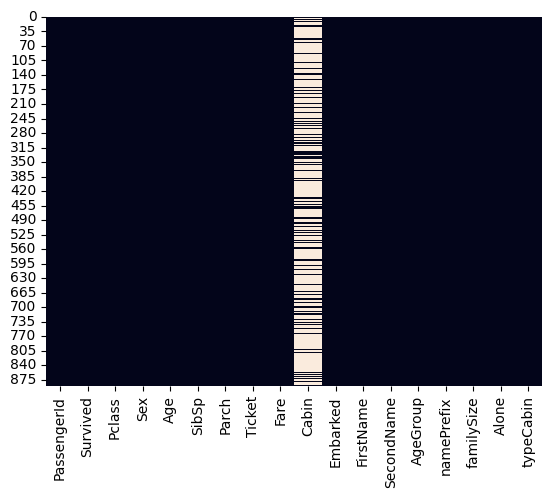

In [ ]:
# Thống kê dữ liệu thiếu trên các biến số và trực quan hóa dữ liệu thiếu bằng biểu đồ (Heat map).
missing_values = df.isnull().sum()

sns.heatmap(df.isnull(), cbar=False) # k hiển thị màu
plt.show()

In [ ]:
# 6
def categorize_age(age):
  if age <= 12:
    return "Kid"
  elif age >12 and age <=18:
    return "Teen"
  elif age >18 and age <= 60:
    return "Adult"
  else:
    return "Older"

df["AgeGroup"] = df["Age"].apply(categorize_age)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName,AgeGroup
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult


In [ ]:
# 7  Tiến hành thêm đặc trưng về danh xưng
# Hàm để trích xuất danh xưng
def name_prefix(name):
    match = re.search(r' (\w+)\.', name)
    if match:
        return match.group(1)
    return None

# Tạo cột mới 'namePrefix' với danh xưng
df['namePrefix'] = df['SecondName'].apply(name_prefix)df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName,AgeGroup,namePrefix
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr


In [ ]:
# 8: family size = 1+ SibSp + Parch

df['familySize'] = df['SibSp'] + df['Parch'] + 1
df.head()


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName,AgeGroup,namePrefix,familySize
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1


In [ ]:
# 9: Alone or not
def alone_or_not(fmls):
  if fmls == 0:
    return 1
  else:
    return 0

df['Alone'] = df['familySize'].apply(alone_or_not)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName,AgeGroup,namePrefix,familySize,Alone
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0


In [ ]:
# 10 Tiến hành tách loại cabin
def extract_typeCabin(cabin):
  if type(cabin) == str:
    return cabin[0]
  else:
    return "Unknown"

df['typeCabin'] = df['Cabin'].apply(extract_typeCabin)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,FirstName,SecondName,AgeGroup,namePrefix,familySize,Alone,typeCabin
0,1,0,3,M,22.0,1,0,A/5 21171,7.2500,NaN,S,Braund,Mr. Owen Harris,Adult,Mr,2,0,Unknown
1,2,1,1,F,38.0,1,0,PC 17599,71.2833,C85,C,Cumings,Mrs. John Bradley (Florence Briggs Thayer),Adult,Mrs,2,0,C
2,3,1,3,F,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Heikkinen,Miss. Laina,Adult,Miss,1,0,Unknown
3,4,1,1,F,35.0,1,0,113803,53.1000,C123,S,Futrelle,Mrs. Jacques Heath (Lily May Peel),Adult,Mrs,2,0,C
4,5,0,3,M,35.0,0,0,373450,8.0500,NaN,S,Allen,Mr. William Henry,Adult,Mr,1,0,Unknown


**PHẦN 2: KHAI THÁC THÔNG TIN HỮU ÍCH – EDA**

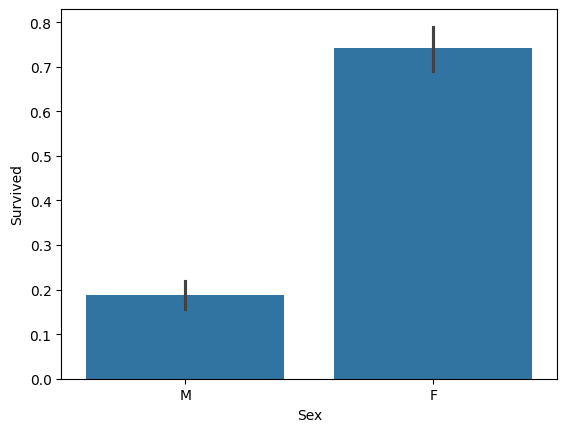

In [ ]:
# 12 Trực quan thông tin tương quan tỉ lệ sống sót và thiệt mạng trên từng nhóm giới tính.
sns.barplot(x="Sex", y="Survived", data=df)
plt.show()

Nhận xét:

Theo biểu đồ, tỷ lệ phần trăm hành khách nữ sống sót cao hơn nhiều so với hành khách nam. Cụ thể, tỷ lệ phần trăm hành khách nữ sống sót là khoảng 72%, trong khi tỷ lệ phần trăm hành khách nam sống sót chỉ là khoảng 38%.

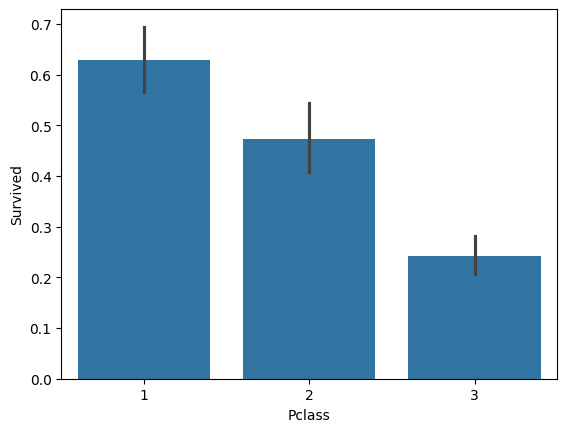

In [ ]:
# 13 Trực quan thông tin hành khách sống sót trên từng nhóm phân loại hành khách (Pclass).
sns.barplot(x="Pclass", y="Survived", data=df)
plt.show()

Nhận xét:

Tỉ lệ sống sót tại nhóm phân loại khách hàng 1 là cao nhất, sau đó là nhóm 2 và thấp nhất là nhóm 3

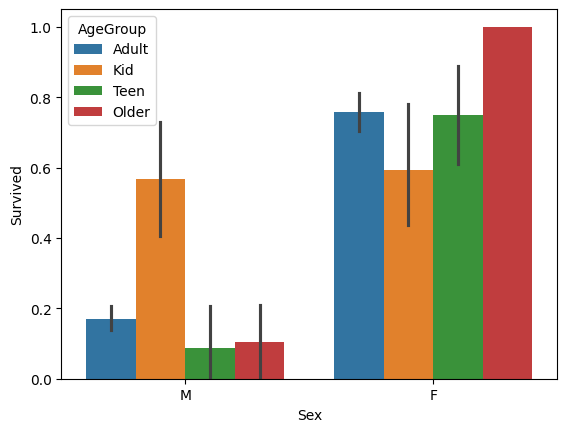

In [ ]:
# 14 Trực quan thông tin hành khách sống sót trên từng nhóm giới tính và thang đo tuổi tác
sns.barplot(x="Sex", y="Survived", hue="AgeGroup", data=df)
plt.show()

Nhận xét:

Tỉ lệ sống sót của phụ nữ cao hơn đàn ông, cùng với đó trong giới tính nam thì trẻ em có tỉ lệ sống sót cao nhất.

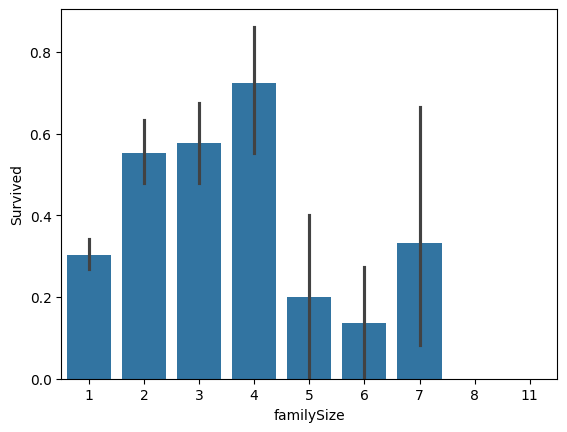

In [ ]:
# 15 Trực quan xác suất hành khách sống sót dựa trên thông tin nhóm đi cùng
sns.barplot(x="familySize", y="Survived", data=df)
plt.show()

Nhận xét:

Tỉ lệ sống sót theo familySize khá phức tạp, nhưng nhóm 4 có tỉ lệ cao nhất và 6 có tỉ lệ thấp nhất.

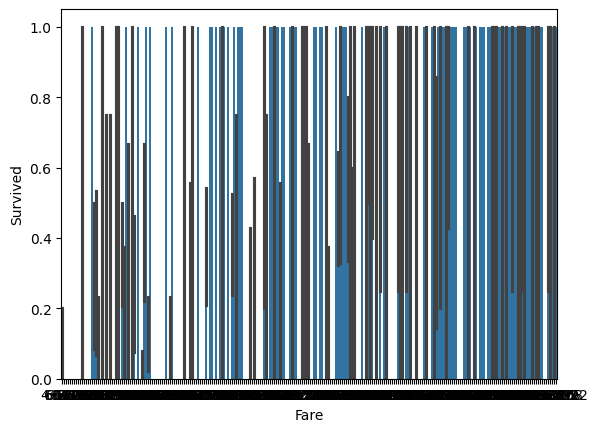

In [ ]:
# 16 Trực quan xác suất hành khách sống sót dựa trên thông tin giá vé
sns.barplot(x="Fare", y="Survived", data=df)
plt.show()

Nhập xét:
No comment.

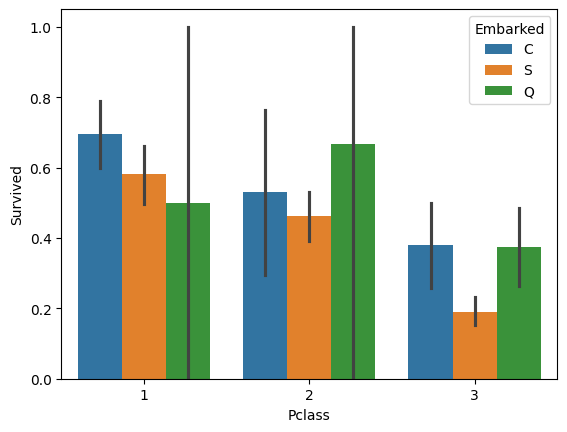

In [ ]:
# 17 Trực quan số lượng người thiệt mạng và sống sót theo phân lớp (Pclass) hành khách và cảng sẽ cập bến.
sns.barplot(x="Pclass", y="Survived", hue="Embarked", data=df)
plt.show()

Nhận xét:

Tại nhóm 1, cảng C có tỉ lệ sống sót cao nhất và Q có tỉ lệ thấp nhất.
Tại nhóm 2, cảng Q có tỉ lệ sống sót cao nhất và S có tỉ lệ thấp nhất.
Tại nhóm 3, càng C và Q có tỉ lệ cao nhất và gần bằng nhau, cảng S có tỉ lệ sống sót thấp nhất.